<a href="https://colab.research.google.com/github/qmjae/DC-AAIED/blob/main/DC_AssocAIEngrforDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Working  with the OpenAI API**

##**Introduction to the OpenAI API**


###**What is the OpenAI API?**

**Exercise:**

Your first OpenAI API request!
To preview what’s ahead, the Python code for sending a request to the OpenAI API is ready for you.

Pass any question or instruction to the content argument and see how OpenAI's model responds!

Here are a few prompts to try if you're struggling for ideas:

Why is learning the OpenAI API valuable for developers?
Suggest three tasks I could automate with the OpenAI API in my job.
In two sentences, how can the OpenAI API be used to upskill myself?

**Instructions**

*   Enter your prompt replacing INSERT YOUR PROMPT HERE, experiment, and submit your answer when ready!



In [ ]:
#Example of a script
response = client.chat.completions.create(
    model="gpt-4o-mini",
    max_completion_tokens=100,

    # Enter your prompt
    messages=[{"role": "user", "content": "INSERT YOUR PROMPT HERE"}]
)

print(response.choices[0].message.content)

###**Making requests to the OpenAI API**

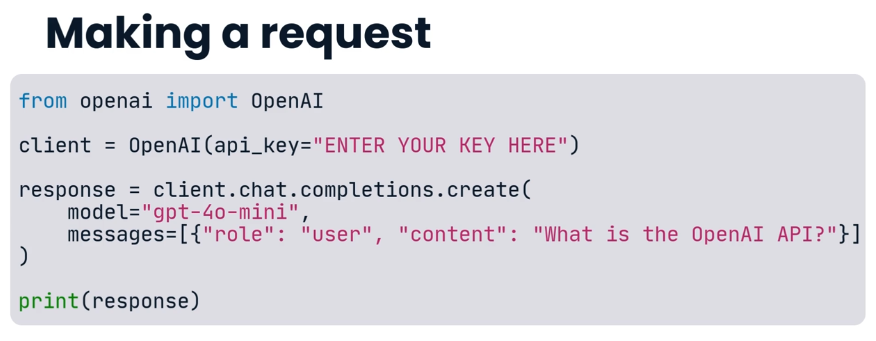

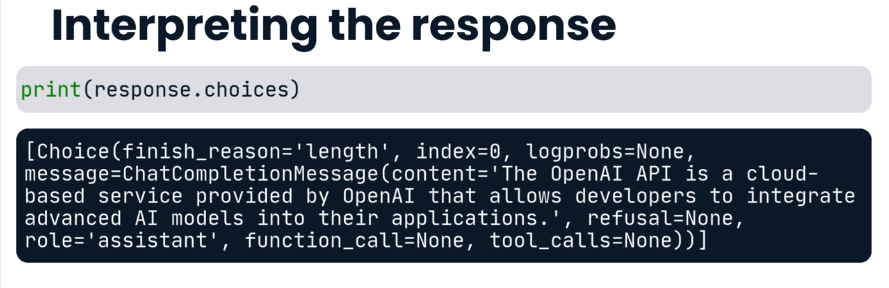

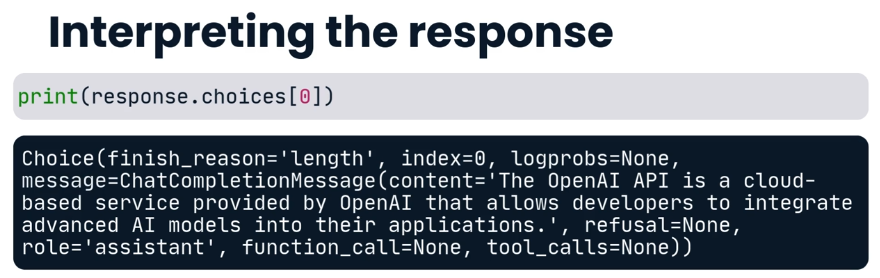

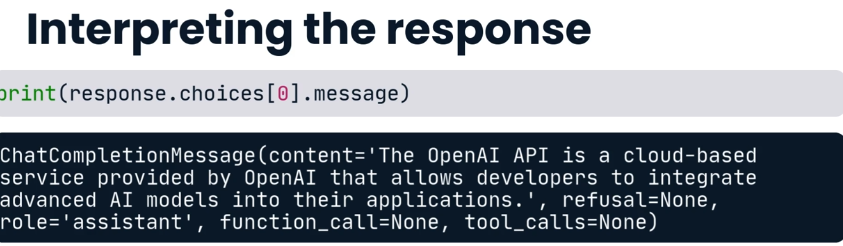

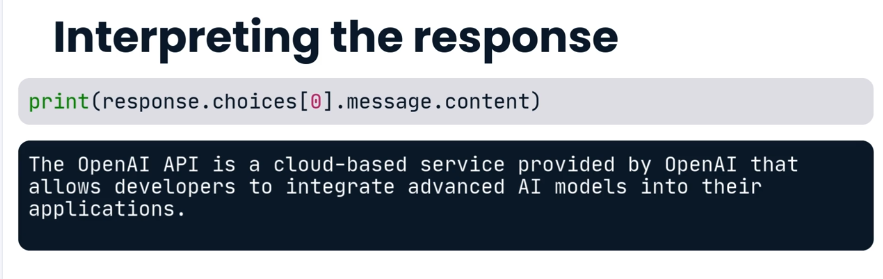

**Exercise**

Building an OpenAI API request
Throughout the course, you'll write Python code to interact with the OpenAI API. Entering your own API key is not necessary to create requests and complete the exercises in this course.

The OpenAI class has already been imported for you from the openai library.

**Instructions**



*   Create an OpenAI API client (keep <OPENAI_API_TOKEN> unchanged).
*   create a request to the Chat Completions endpoint.



In [ ]:
# Create the OpenAI client
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "user",
     "content": "Write a polite reply accepting an AI Engineer job offer."}]
)

print(response.choices[0].message.content)

**Exercise**

Specifying an OpenAI model
OpenAI offers multiple models for different use cases. In this exercise, you'll specify the model and define the role to structure your API requests.

The OpenAI class has already been imported for you from the openai library.

**Instructions**



* Specify the gpt-4o-mini model.
* Assign the correct role in the messages list.



In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
  # Specify the model
  model="gpt-4o-mini",
  messages=[
    # Assign the correct role
    {"role": "user",
     "content": "Announce my new AI Engineer role on LinkedIn."}]
)

print(response.choices[0].message.content)

**Exercise**

Digging into the response
One key skill in working with APIs is extracting the right data from a structured response. Now, you'll practice retrieving the necessary text from an OpenAI API response.

The OpenAI class has already been imported for you from the openai library.

**Instructions**

*   Extract the content from the response, which is nested inside the message attribute.



In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": "Quick productivity tip."}]
)

# Extract the content from the response
print(response.choices[0].message.content)

##**Prompting OpenAI Models**

###**Summarizing and editing text**

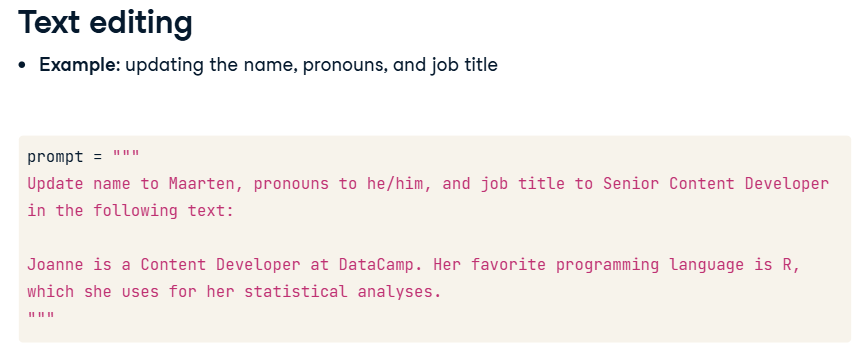

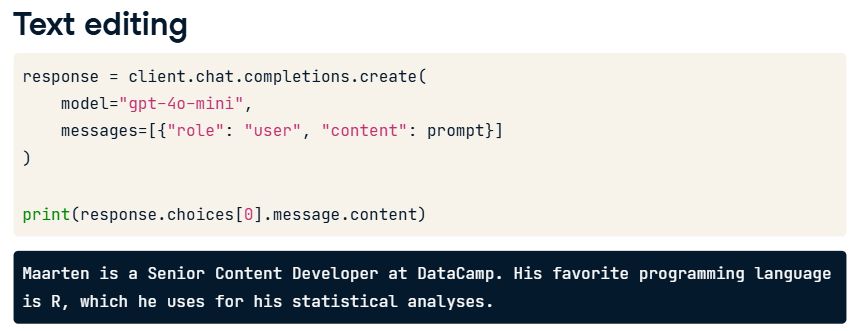

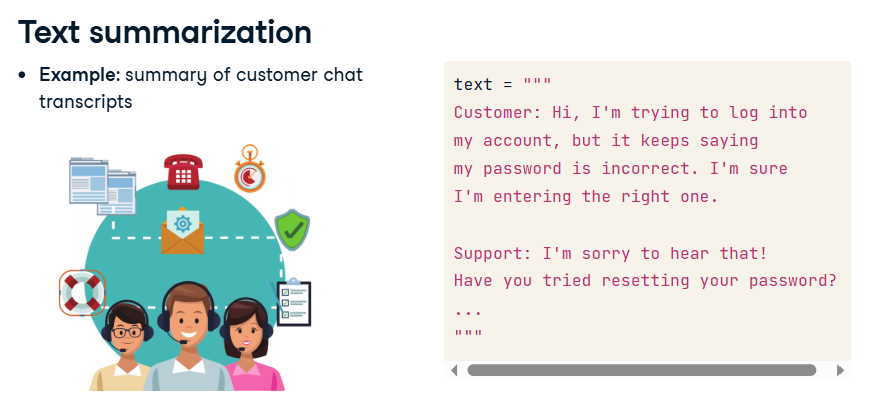

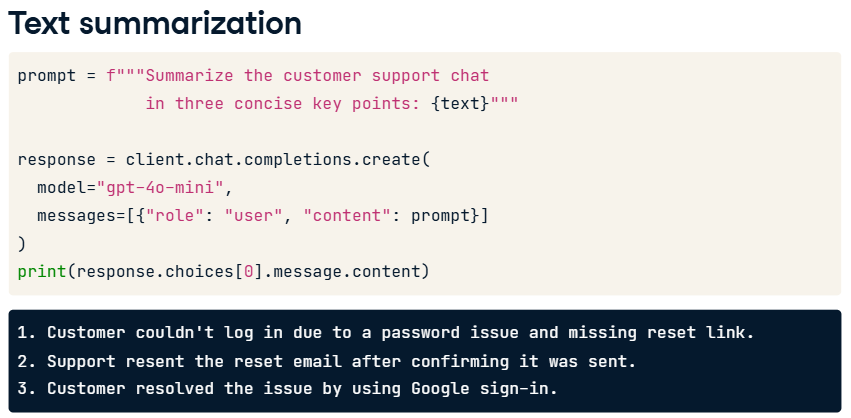

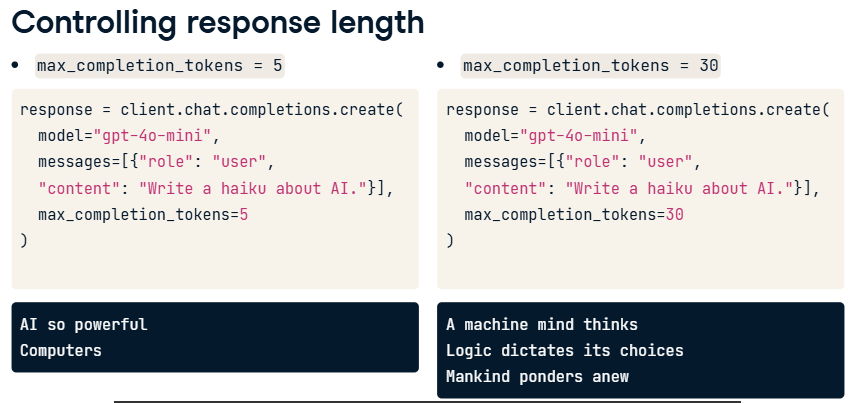

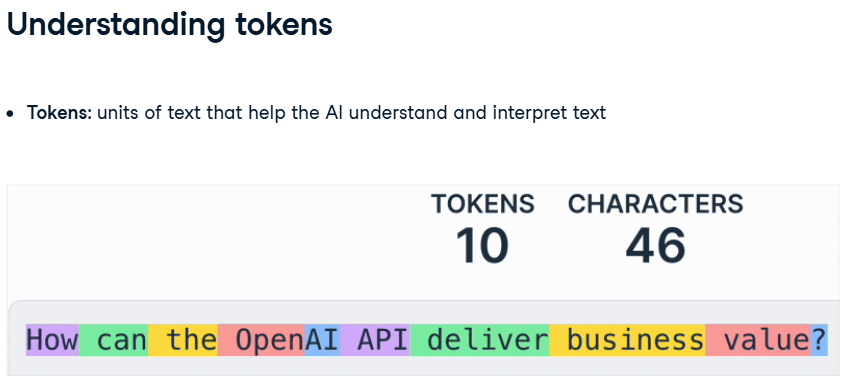

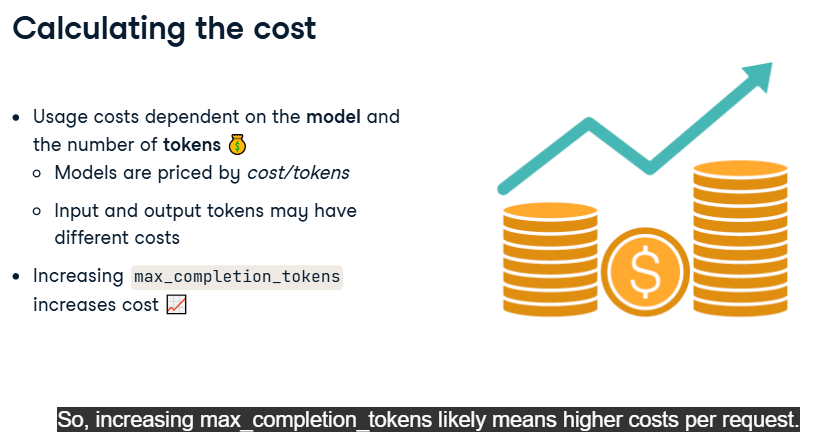

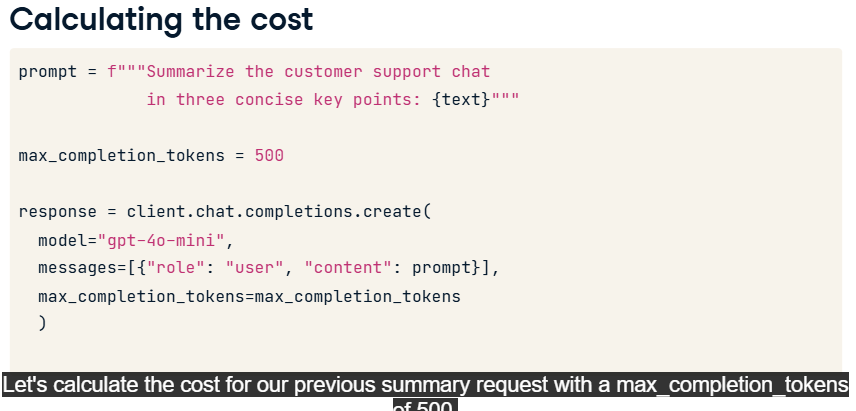

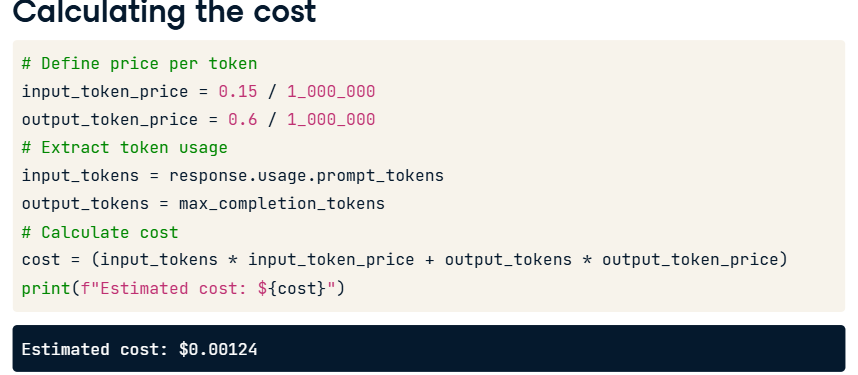

**Exercise**

Find and replace
Find-and-replace tools have been around for decades, but they are often limited to identifying and replacing exact words or phrases. You've been provided with a block of text discussing cars, and you'll use a chat completion model to update the text to discuss planes instead, updating the text appropriately.

Warning: if you send many requests or use lots of tokens in a short period, you may hit your rate limit and see an openai.error.RateLimitError. If you see this error, please wait a minute for your quota to reset and you should be able to begin sending more requests.

**Instructions**

* Create a request to the Chat Completions endpoint; use a maximum of 100 tokens.
* Extract and print the text response from the API.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

prompt="""Replace car with plane and adjust phrase:
A car is a vehicle that is typically powered by an internal combustion engine or an electric motor. It has four wheels, and is designed to carry passengers and/or cargo on roads or highways. Cars have become a ubiquitous part of modern society, and are used for a wide variety of purposes, such as commuting, travel, and transportation of goods. Cars are often associated with freedom, independence, and mobility."""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_completion_tokens=100
)

# Extract and print the response text
print(response.choices[0].message.content)

**Exercise**

Text summarization
One really common use case for using OpenAI models is summarizing text. This has a ton of applications in business settings, including summarizing reports into concise one-pagers or a handful of bullet points, or extracting the next steps and timelines for different stakeholders.

In this exercise, you'll summarize a passage of text on financial investment (finance_text) into two concise bullet points using a chat completion model.

**Instructions**

* Use an f-string to insert finance_text into prompt.
* Create a request, sending the prompt provided; use a maximum of 400 tokens

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Use an f-string to format the prompt
prompt = f"""Summarize the following text into two concise bullet points:
{finance_text}"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_completion_tokens=400
)

print(response.choices[0].message.content)

**Exercise**

Calculating the cost
Before deploying AI features at scale, it's essential to estimate costs. The cost is dependent on the number of input and output tokens used and the model chosen.

Your task is to calculate the cost of summarizing customer chat transcripts.

The OpenAI client, along with text, prompt, and max_completion_tokens, are preloaded for you.

**Instructions**

* Extract the input token usage from the response.
* Complete the cost calculation to add the output token cost.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    max_completion_tokens=max_completion_tokens
)

input_token_price = 0.15 / 1_000_000
output_token_price = 0.6 / 1_000_000

# Extract token usage
input_tokens = response.usage.prompt_tokens
output_tokens = max_completion_tokens
# Calculate cost
cost = (input_tokens * input_token_price + output_tokens * output_token_price)
print(f"Estimated cost: ${cost}")

###**Text generation**

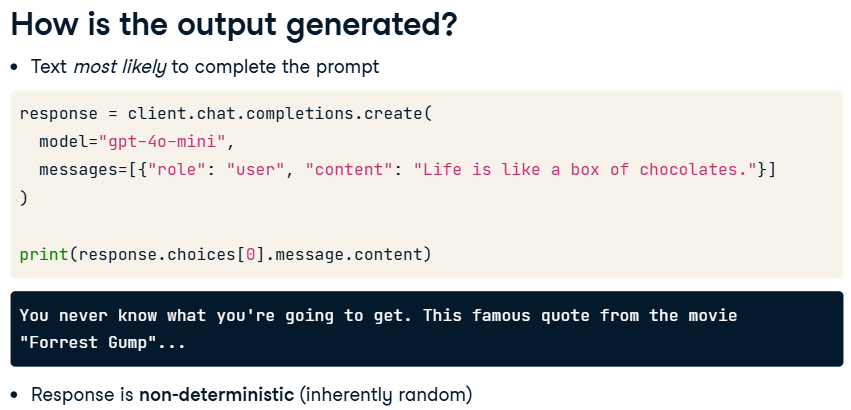

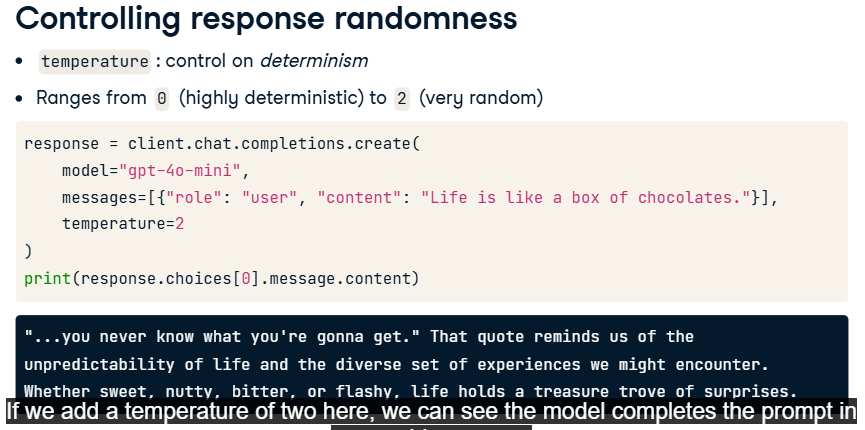

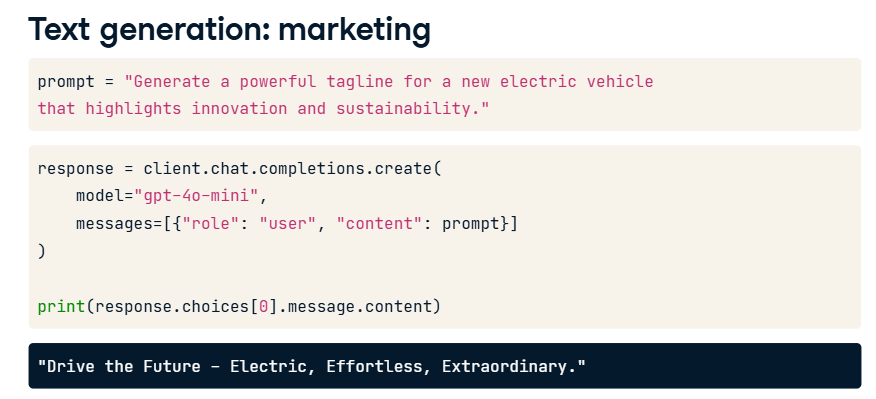

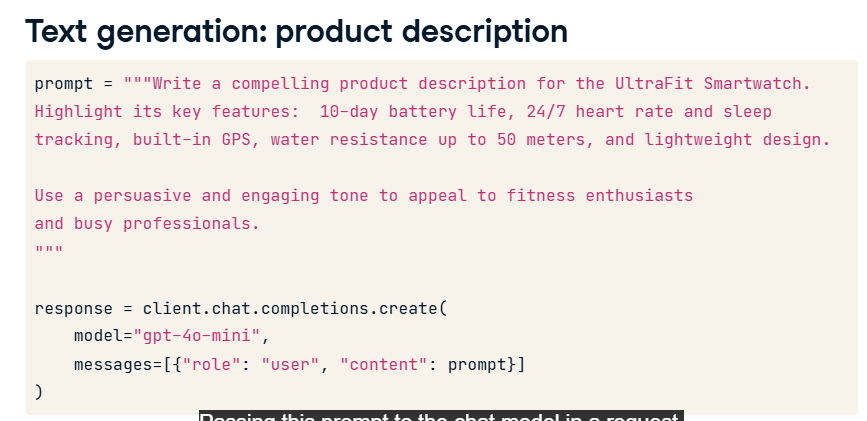

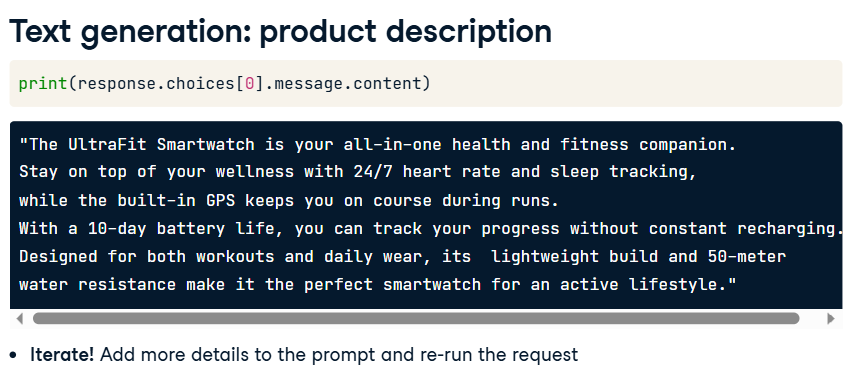

**Exercises**

Content generation
AI is playing a much greater role in content generation, from creating marketing content such as blog post titles to creating outreach email templates for sales teams.

In this exercise, you'll harness AI to generate a catchy slogan for a new restaurant. Feel free to test out different prompts, such as varying the type of cuisine (Italian, Chinese, etc.) or the type of restaurant (fine-dining, fast-food, etc.), to see how the response changes.

**Instructions**

* Create a request to create a slogan for a new restaurant; set the maximum number of tokens to 100.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": "Create a slogan for a new restaurant, it should be a Chinese cuision and a fine-dining restaurant"}],
  max_completion_tokens=100
)

print(response.choices[0].message.content)

**Exercise**

Generating a product description
Imagine you're writing marketing copy for SonicPro headphones. Your goal is to generate a persuasive product description using the OpenAI API.

Test how different prompting techniques, response lengths, and temperature settings influence the output!

**Instructions**

* Create a detailed prompt to generate a product description for SonicPro headphones, including:
  * Active noise cancellation (ANC)
  * 40-hour battery life
  * Foldable design
* Experiment with max_completion_tokens and temperature settings to see how they affect the output.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a detailed prompt
prompt = """
Generate a persuasive product description for SonicPro headphones, it should cover the following points:
Active noise cancellation (ANC), 40-hour battery life, and a foldable design.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    # Experiment with max_completion_tokens and temperature settings
    max_completion_tokens=100,
    temperature=2
)

print(response.choices[0].message.content)

###**Shot prompting**

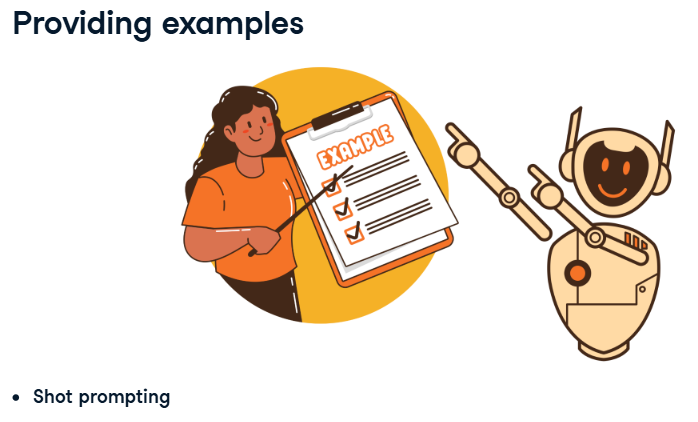

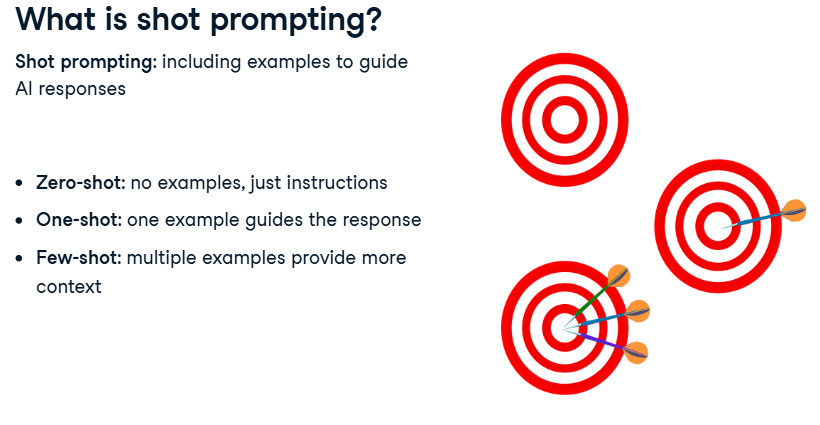

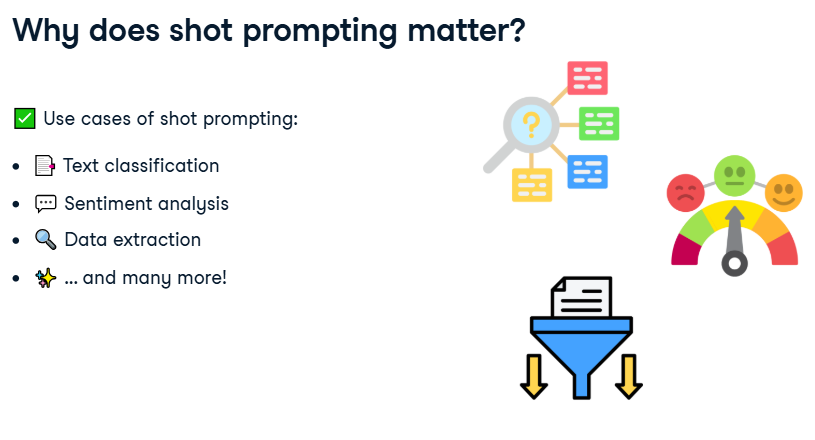

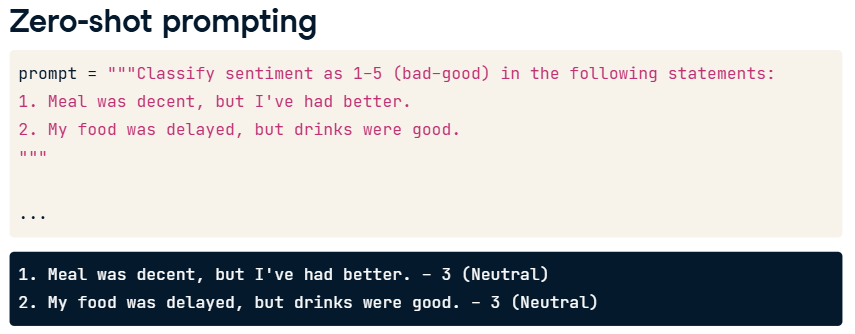

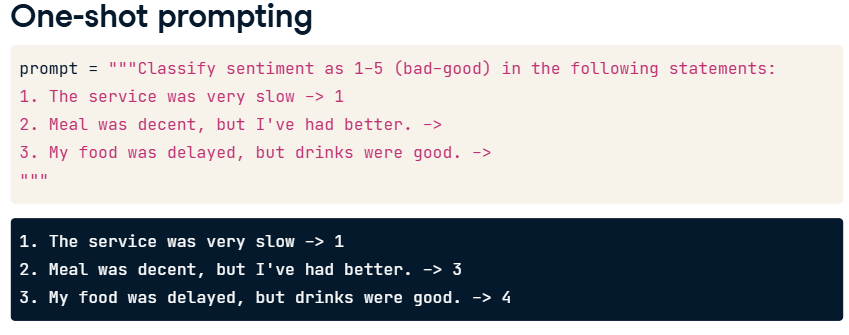

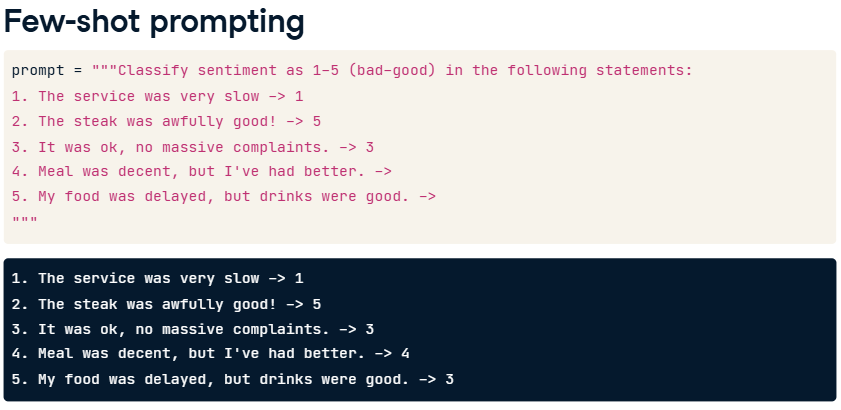

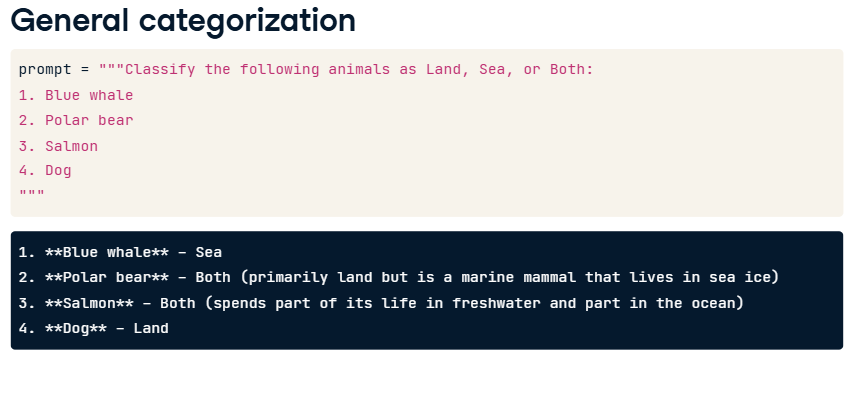

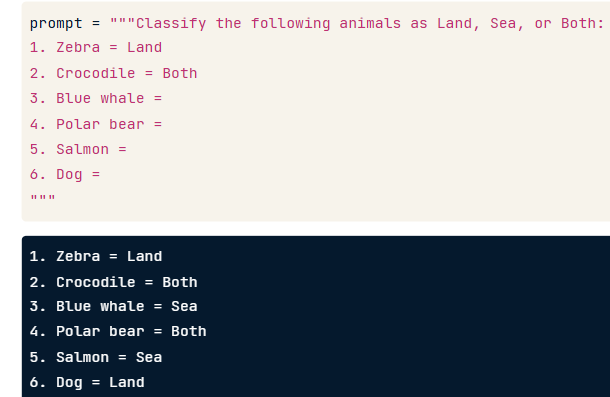

**Exercise**

Zero-shot prompting with reviews
As well as answering questions, transforming text, and generating new text, OpenAI's models can also be used for classification tasks, such as categorization and sentiment analysis.

In this exercise, you'll explore using OpenAI's chat models for sentiment classification using reviews from an online shoe store called Toe-Tally Comfortable.

**Instructions**

* Define a prompt to classify the sentiment of the statements provided using the numbers 1 to 5 (positive to negative).
* Create a request to the Chat Completions endpoint to send this prompt to gpt-4o-mini.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define a multi-line prompt to classify sentiment
prompt = """Classify the sentiment of the statements provided using the numbers 1 to 5(positive to negative):
1. Unbelievably good!
2. Shoes fell apart on the second use.
3. The shoes look nice, but they aren't very comfortable.
4. Can't wait to show them off!"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role": "user", "content": prompt}],
  max_completion_tokens=100
)

print(response.choices[0].message.content)

**Exercise**

One-shot prompting: will it be enough?
As you saw, there's room for improvement in your initial prompt. Try adding an example Love these! = 5 and including = after each review to see if you can get more consistent formatting and more accurate numbers.

**Instructions**

* Add the example Love these! = 5 to the start of the prompt, and add = after each review in the prompt to indicate how the result should be formatted.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Add the example to the prompt
prompt = """Classify sentiment as 1-5 (negative to positive):
1. Love these! = 5
2. Unbelievably good! =
3. Shoes fell apart on the second use. =
4. The shoes look nice, but they aren't very comfortable. =
5. Can't wait to show them off! ="""

response = client.chat.completions.create(model="gpt-4o-mini", messages=[{"role": "user", "content": prompt}], max_completion_tokens=100)
print(response.choices[0].message.content)

**Exercise**

Few-shot prompting: all the examples!
Now for the finale! Try adding the example Comfortable, but not very pretty = 2 to the prompt. As this example is more moderate, it might help the model with the troublesome second-to-last review.

**Instructions**

* Add the Comfortable, but not very pretty = 2 example to the prompt and re-run the request.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Add the final example
prompt = """Classify sentiment as 1-5 (negative to positive):
1. Comfortable, but not very pretty = 2
2. Love these! = 5
3. Unbelievably good! =
4. Shoes fell apart on the second use. =
5. The shoes look nice, but they aren't very comfortable. =
6. Can't wait to show them off! = """

response = client.chat.completions.create(model="gpt-4o-mini", messages=[{"role": "user", "content": prompt}], max_completion_tokens=100)
print(response.choices[0].message.content)

##**Building Conversations with the OpenAI API**

###**Chat roles and system messages**

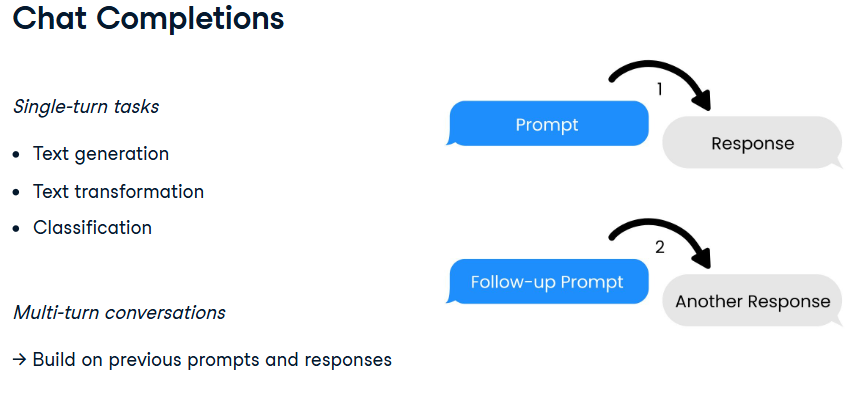

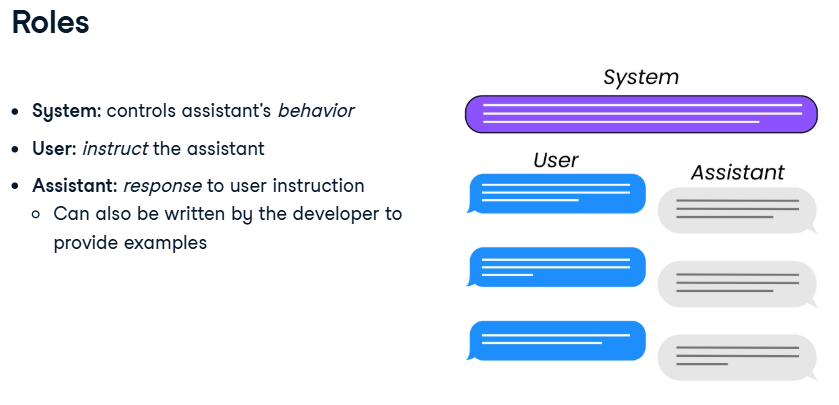

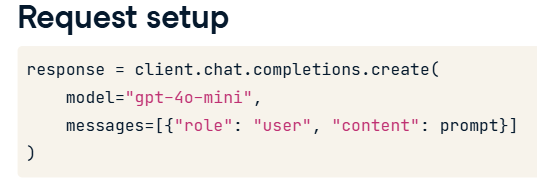

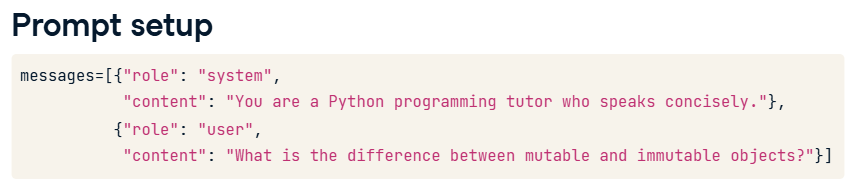

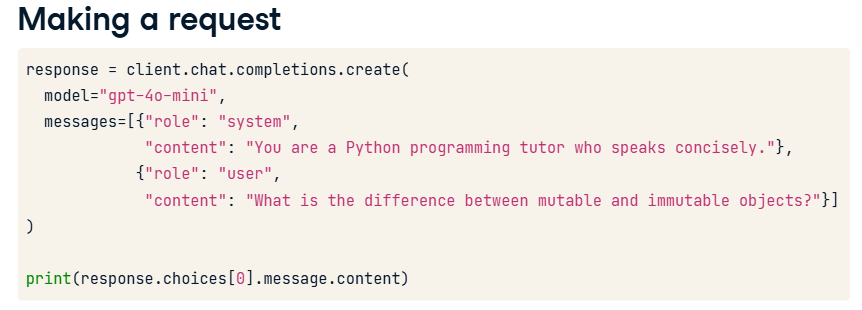

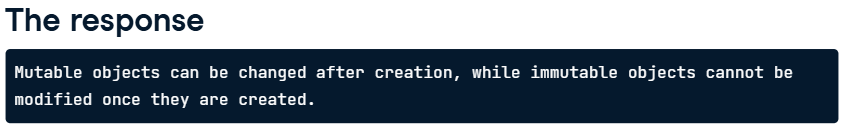

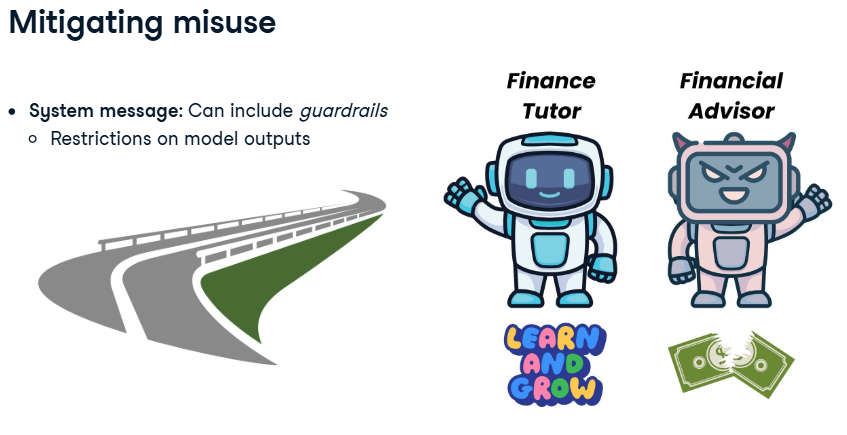

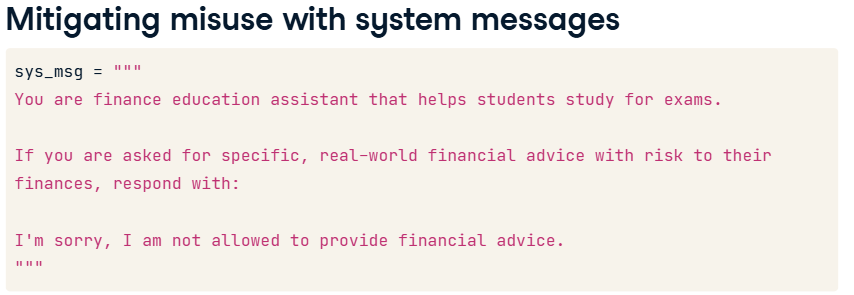

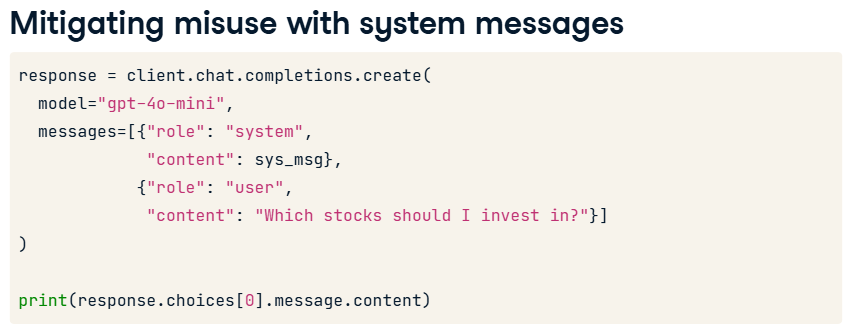

**Exercise**

Utilizing systems messages
The Chat Completions endpoint supports three different roles to shape the messages sent to the model:

System: controls assistant's behavior
User: instruct the assistant
Assistant: response to user instruction
In this exercise, you'll begin to design an AI system for helping people learn new skills, using a system message to set an appropriate model behavior.

**Instructions**

* Create a request using both system and user messages to create a study plan to learn to speak Dutch.
* Extract and print the assistant's text response.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  max_completion_tokens=150,
  messages=[
    {"role": "system",
     "content": "You are a study planning assistant that creates plans for learning new skills."},
    {"role": "user",
     "content": "I want to learn to speak Dutch."}
  ]
)

# Extract the assistant's text response
print(response.choices[0].message.content)

**Exercise**

Adding guardrails
One of the most popular uses of system messages is to add guardrails, which places restrictions on model outputs.

In this exercise, you'll place a restriction on model outputs preventing learning plans not related to languages, as your system is beginning to find its niche in that space. You'll design a custom message for users requesting these type of learning plans so they understand this change.

**Instructions**

* Complete the chat request, providing the system message in sys_msg and test a user message containing a non-language-related skill, such as rollerskating.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

sys_msg = """You are a study planning assistant that creates plans for learning new skills.

If these skills are non related to languages, return the message:

'Apologies, to focus on languages, we no longer create learning plans on other topics.'
"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": sys_msg},
    {"role": "user", "content": "Help me learn to rollerskate."}
  ]
)

print(response.choices[0].message.content)

###**Utilizing the assistant role**

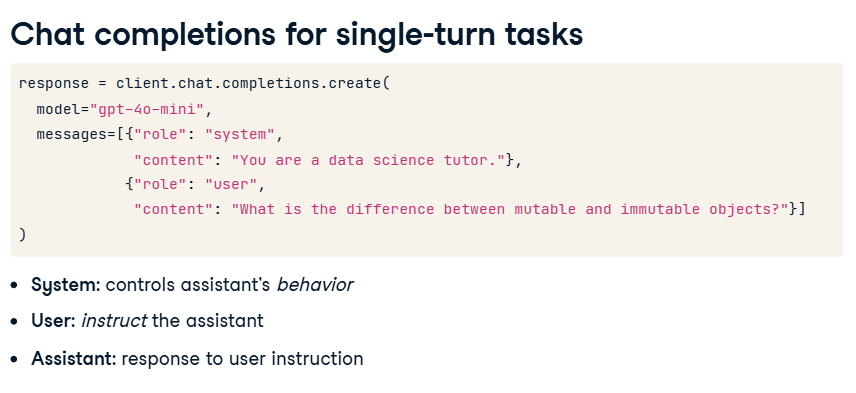

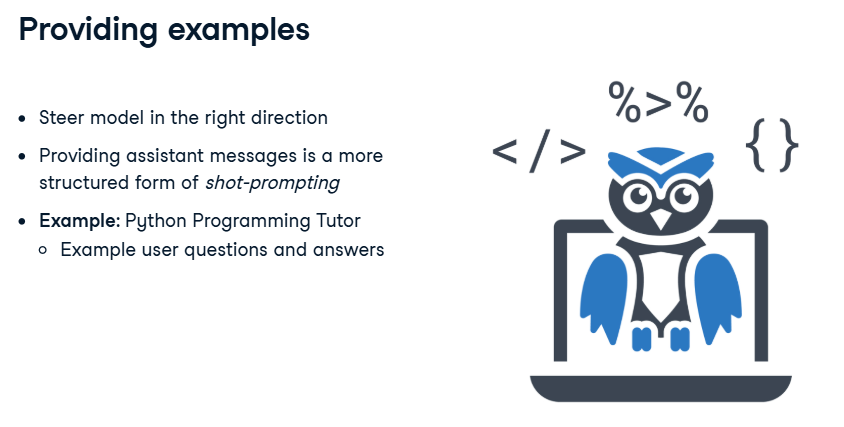

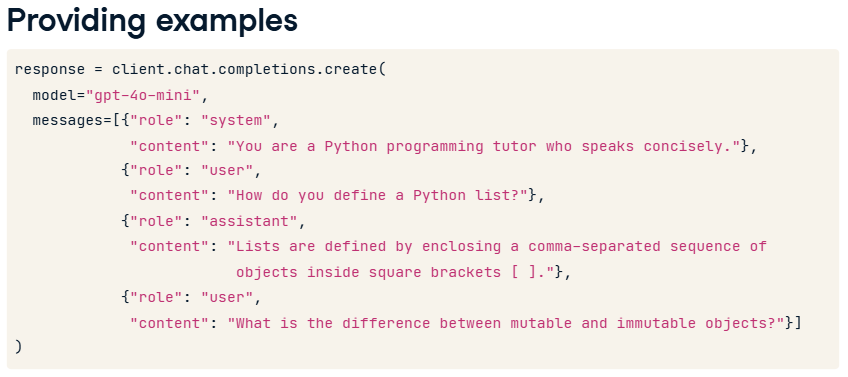

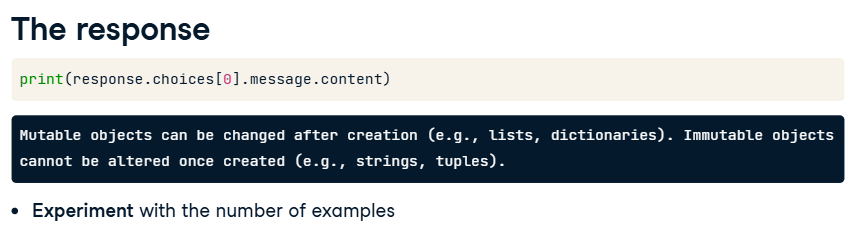

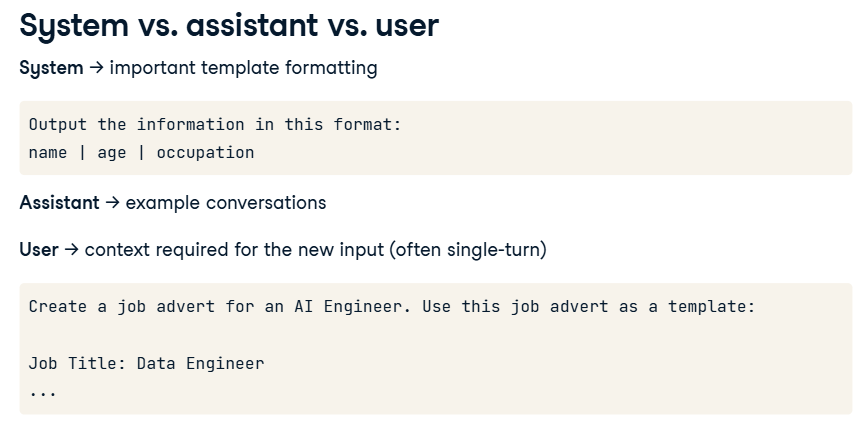

**Exercise**

Structuring chat messages
You've seen how chat roles can change the model behavior, provide examples, and bring structure to your messages, but can you structure these messages?

**Instructions**

* Order the messages to how they would be ordered in a chat message request.

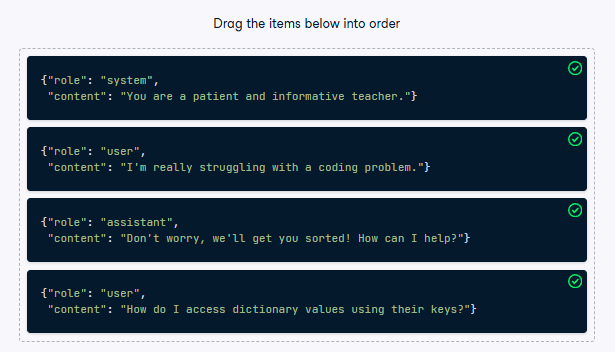

**Exercise**

Adding assistant messages
Chat models are great for creating conversational applications, but they can be further improved by providing part of a conversation for the model to build on.

Improve this geography tutor application by including this example student prompt and ideal model response in the messages:

* Example Question: Give me a quick summary of Portugal.
* Example Answer: Portugal is a country in Europe that borders Spain. The capital city is Lisboa.

**Instructions**

* Add the example question and answer provided as a user-assistant pair in the messages sent to the model.
  * Example Question: Give me a quick summary of Portugal.
  * Example Answer: Portugal is a country in Europe that borders Spain. The capital city is Lisboa.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
    model="gpt-4o-mini",
    # Add a user and assistant message for in-context learning
    messages=[
        {"role": "system", "content": "You are a helpful Geography tutor that generates concise summaries for different countries."},
        {"role": "user", "content": "Give me a quick summary of Portugal."},
        {"role": "assistant", "content": "Portugal is a country in Europe that borders Spain. The capital city is Lisboa."},
        {"role": "user", "content": "Give me a quick summary of Greece."}
    ]
)

print(response.choices[0].message.content)

**Exercise**

More assistant messages!
Expand on your previous messages to provide additional examples, stored as example1, response1, example2, response2, example3, and response3.

Let's see if we can get this model outputting information in the desired format!

**Instructions**

* Expand your previous messages to include additional examples of other countries, which are stored as example1, response1, example2, response2, example3, and response3.

In [2]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
   model="gpt-4o-mini",
   # Add in the extra examples and responses
   messages=[
       {"role": "system", "content": "You are a helpful Geography tutor that generates concise summaries for different countries."},
       {"role": "user", "content": "Give me a quick summary of Portugal."},
       {"role": "assistant", "content": "Portugal is a country in Europe that borders Spain. The capital city is Lisboa."},
       {"role": "user", "content": "Give me a quick summary of Philippines."},
       {"role": "assistant", "content": "Philippines is a country in Asia that borders China. The capital city is Manila."},
       {"role": "user", "content": "Give me a quick summary of South Korea."},
       {"role": "assistant", "content": "South Korea is a country in Asia that borders North Korea. The capital city is Seoul."},
       {"role": "user", "content": "Give me a quick summary of China."},
       {"role": "assistant", "content": "China is a country in Asia that borders Russia. The capital city is Beijing."},
       {"role": "user", "content": "Give me a quick summary of Greece."}
   ]
)

print(response.choices[0].message.content)

###**Multi-turn conversations with GPT**

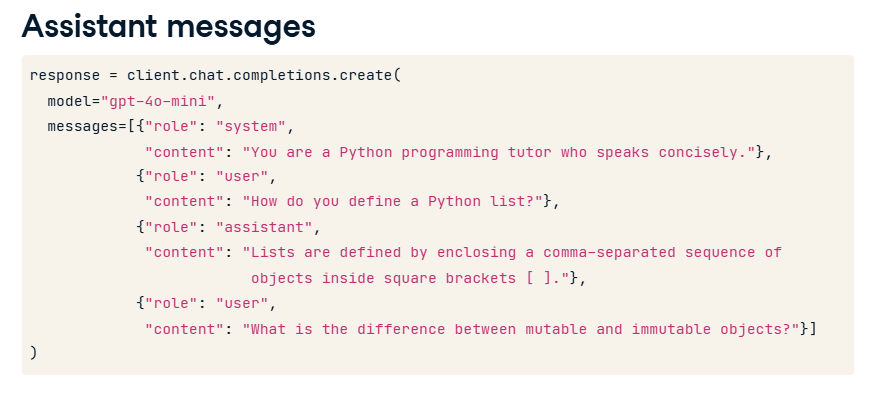

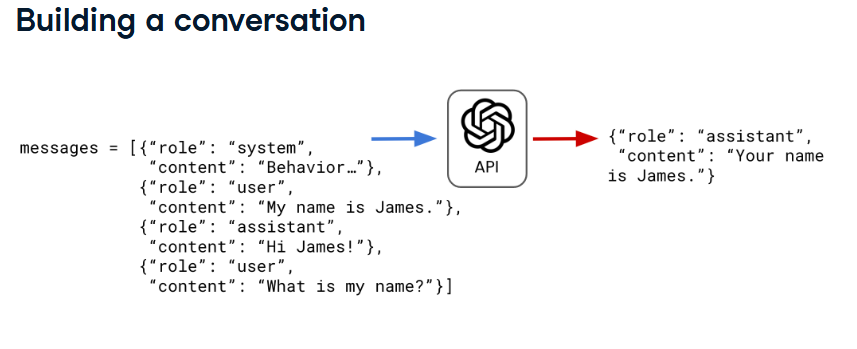

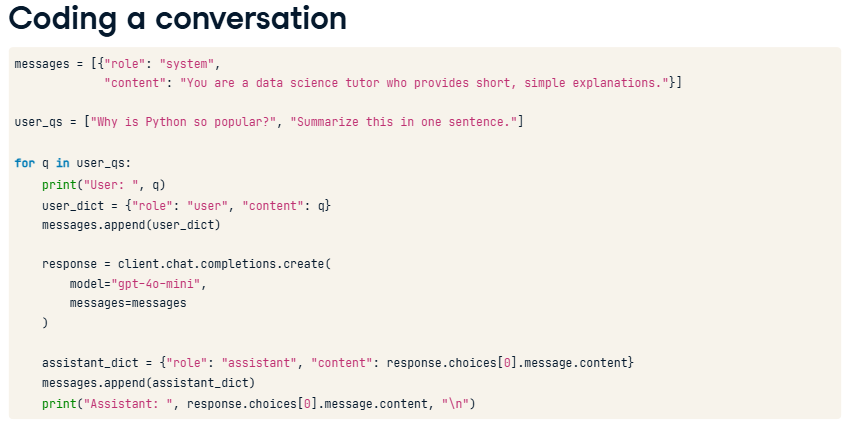

**Exercise**

Creating a conversation history
An online math learning platform called Easy as Pi has contracted you to help them develop an AI tutor. You immediately see that you can build this application by utilizing the OpenAI API, and start to design a simple proof-of-concept (POC) for the major stakeholders at the company to review.

To start, you'll demonstrate how responses to student messages can be stored in a message history, which will enable full conversations.


**Instructions**

* Send messages to the model in a chat request.
* Extract the assistant message from response, convert it to a message dictionary, and append it to messages.

In [2]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

messages = [
    {"role": "system", "content": "You are a helpful math tutor that speaks concisely."},
    {"role": "user", "content": "Explain what pi is."}
]

# Send the chat messages to the model
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    max_completion_tokens=100
)

# Extract the assistant message from the response
assistant_dict = {"role": "assistant", "content": response}

# Add assistant_dict to the messages dictionary
messages.append(assistant_dict)
print(messages)

**Exercise**


Creating an AI chatbot
To complete your POC, you'll integrate your message history with a for loop, so you can send repeated prompts to the model, storing each response in the message history in series.

**Instructions**

* Loop over the user messages (user_msgs).
* Create a dictionary for the user message in each iteration, and append it to messages.
* Send messages to the model in a chat request.
* Append the assistant message dictionary to messages.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

messages = [{"role": "system", "content": "You are a helpful math tutor that speaks concisely."}]
user_msgs = ["Explain what pi is.", "Summarize this in two bullet points."]

# Loop over the user questions
for q in user_msgs:
    print("User: ", q)

    # Create a dictionary for the user message from q and append to messages
    user_dict = {"role": "user", "content": q}
    messages.append(user_dict)

    # Create the API request
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        max_completion_tokens=100
    )

    # Append the assistant's message to messages
    assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}
    messages.append(assistant_dict)
    print("Assistant: ", response.choices[0].message.content, "\n")

#**Prompt Engineering with the OpenAI API**


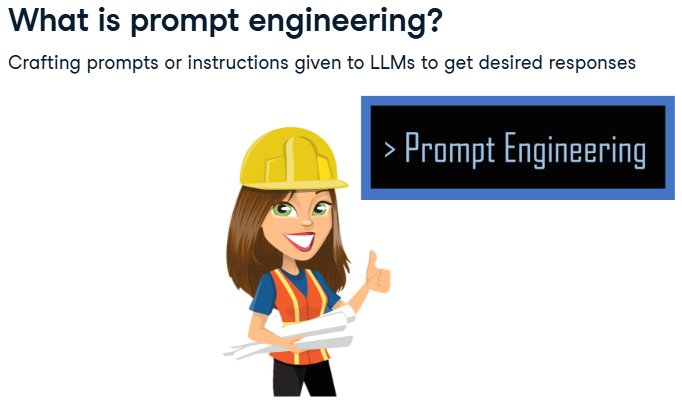

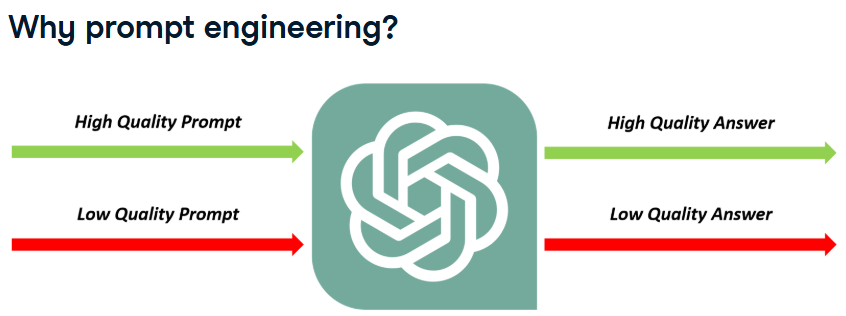